# DESAFIO CODENATION  - 2019 #

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

In [1]:
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_data = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_data.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_data = df_data.drop("Unnamed: 0", axis=1)
df_data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


## Análise Exploratória ##

In [5]:
#Verificando se o conjunto de teste está dentro do conjunto de treino
print(set(df_test.columns).issubset(set(df_data.columns)))

True


In [6]:
#Salvando Numero de inscriçao
df_resposta = pd.DataFrame()
df_resposta = df_test['NU_INSCRICAO']
df_resposta = df_resposta.to_frame()

In [7]:
#Verificando se todos os itens da coluna NU_ANO estão com o ano correto (2016)
print("Total de linhas:",df_data.shape[0])
print("Total de '2016' na coluna NU_ANO:",df_data[df_data.NU_ANO == 2016]['NU_ANO'].count())

Total de linhas: 13730
Total de '2016' na coluna NU_ANO: 13730


In [8]:
#Copiando o dataframe para realizar as alterações e preservar os dados originais
df = df_data

In [9]:
df = df.drop("NU_ANO", axis=1)
df.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2304707,Granja,23,CE,17,F,0.0,3,1,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2304400,Fortaleza,23,CE,21,F,0.0,3,1,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,1302603,Manaus,13,AM,28,M,0.0,2,1,...,NaN,A,A,A,A,A,A,A,A,A


In [10]:
columns = ["CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA", "CO_MUNICIPIO_NASCIMENTO",
           "NO_MUNICIPIO_NASCIMENTO"]
df = df.drop(columns, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,1,43.0,RS,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,1,23.0,CE,2,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,21,F,0.0,3,1,23.0,CE,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,25,F,0.0,0,1,33.0,RJ,1,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,28,M,0.0,2,1,15.0,PA,1,...,NaN,A,A,A,A,A,A,A,A,A


In [11]:
#Verificando se todos os itens da coluna TP_NACIONALIDADE estão com o tipo 1
print("Total de linhas:",df.shape[0])
print("Total de '1' na coluna TP_NACIONALIDADE:",df[df.TP_NACIONALIDADE == 1]['TP_NACIONALIDADE'].count())

Total de linhas: 13730
Total de '1' na coluna TP_NACIONALIDADE: 13121


In [12]:
#95% são do tipo 1
remove_other_types = df[(df.TP_NACIONALIDADE!=1)].index
df = df.drop(remove_other_types, axis=0)
df = df.drop("TP_NACIONALIDADE", axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,43.0,RS,1,4,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,23.0,CE,2,0,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,21,F,0.0,3,23.0,CE,3,0,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,25,F,0.0,0,33.0,RJ,1,9,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,28,M,0.0,2,15.0,PA,1,4,...,NaN,A,A,A,A,A,A,A,A,A


In [13]:
#Verificando quantidade de dados faltantes
print(df.CO_ESCOLA.isnull().sum())
print(df.NO_MUNICIPIO_ESC.isnull().sum())
print(df.CO_UF_ESC.isnull().sum())

9058
9058
9058


In [14]:
columns_drop = ["CO_UF_NASCIMENTO","CO_ESCOLA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC", "CO_UF_ESC", "SG_UF_ESC"]
df = df.drop(columns_drop, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,RS,1,4,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,CE,2,0,2,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,21,F,0.0,3,CE,3,0,1,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,25,F,0.0,0,RJ,1,9,1,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,28,M,0.0,2,PA,1,4,1,...,NaN,A,A,A,A,A,A,A,A,A


In [15]:
#Verificando quantidade de dados faltantes
print(df.TP_DEPENDENCIA_ADM_ESC.isnull().sum())
print(df.TP_LOCALIZACAO_ESC.isnull().sum())
print(df.TP_SIT_FUNC_ESC.isnull().sum())
print(df.TP_ENSINO.isnull().sum())

9058
9058
9058
9058


In [16]:
#Verificando quantidade de dados faltantes
print(df.NO_ENTIDADE_CERTIFICACAO.isnull().sum())
print(df.CO_UF_ENTIDADE_CERTIFICACAO.isnull().sum())
print(df.SG_UF_ENTIDADE_CERTIFICACAO.isnull().sum())

11583
11583
11583


In [17]:
#Verificando quantidade de dados faltantes
print(df.CO_MUNICIPIO_PROVA.isnull().sum())
print(df.CO_UF_PROVA.isnull().sum())

0
0


In [18]:
lista_colunas = ["TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "TP_ENSINO", "NO_ENTIDADE_CERTIFICACAO",
                 "CO_UF_ENTIDADE_CERTIFICACAO", "SG_UF_ENTIDADE_CERTIFICACAO", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA"]
df = df.drop(lista_colunas, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,RS,1,4,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,CE,2,0,2,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,21,F,0.0,3,CE,3,0,1,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,25,F,0.0,0,RJ,1,9,1,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,28,M,0.0,2,PA,1,4,1,...,NaN,A,A,A,A,A,A,A,A,A


In [19]:
#Removendo quem faltou
rows_to_remove = df[(df.TP_PRESENCA_CN == 0)].index
print(df.shape[0])
df = df.drop(rows_to_remove)
print(df.shape[0])

13121
9922


In [20]:
rows_to_remove = df[(df.TP_PRESENCA_CH == 0)].index
print(len(rows_to_remove))
rows_to_remove = df[(df.TP_PRESENCA_LC == 0)].index
print(len(rows_to_remove))
df = df.drop(rows_to_remove)
print(df.shape[0])
rows_to_remove = df[(df.TP_PRESENCA_MT == 0)].index
print(len(rows_to_remove))

0
226
9696
0


In [21]:
# Removendo quem foi eliminidao
rows_to_remove = df[(df.TP_PRESENCA_CN == 2)].index
print(df.shape[0])
print(len(rows_to_remove))
df = df.drop(rows_to_remove)
print(df.shape[0])
rows_to_remove = df[(df.TP_PRESENCA_CH == 2)].index
print(len(rows_to_remove))
rows_to_remove = df[(df.TP_PRESENCA_LC == 2)].index
print(df.shape[0])
print(len(rows_to_remove))
df = df.drop(rows_to_remove)
print(df.shape[0])
rows_to_remove = df[(df.TP_PRESENCA_MT == 0)].index
print(len(rows_to_remove))

9696
4
9692
0
9692
5
9687
0


In [22]:
columns = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]
df = df.drop(columns, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,RS,1,4,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,CE,2,0,2,...,NaN,A,A,C,A,B,A,A,C,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,BA,18,F,0.0,1,BA,1,1,1,...,NaN,A,A,A,A,A,A,A,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,MT,18,F,0.0,3,SE,2,0,2,...,0.0,A,A,A,B,B,A,A,A,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,RS,18,F,0.0,1,SP,1,1,1,...,NaN,C,A,A,A,A,D,A,A,A


In [23]:
columns = ["TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TP_LINGUA",
           "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT"]
df = df.drop(columns, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,RS,1,4,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,CE,2,0,2,...,NaN,A,A,C,A,B,A,A,C,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,BA,18,F,0.0,1,BA,1,1,1,...,NaN,A,A,A,A,A,A,A,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,MT,18,F,0.0,3,SE,2,0,2,...,0.0,A,A,A,B,B,A,A,A,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,RS,18,F,0.0,1,SP,1,1,1,...,NaN,C,A,A,A,A,D,A,A,A


In [24]:
columns = ["TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]
df = df.drop(columns, axis=1)
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,24,M,0.0,1,RS,1,4,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,17,F,0.0,3,CE,2,0,2,...,NaN,A,A,C,A,B,A,A,C,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,BA,18,F,0.0,1,BA,1,1,1,...,NaN,A,A,A,A,A,A,A,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,MT,18,F,0.0,3,SE,2,0,2,...,0.0,A,A,A,B,B,A,A,A,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,RS,18,F,0.0,1,SP,1,1,1,...,NaN,C,A,A,A,A,D,A,A,A


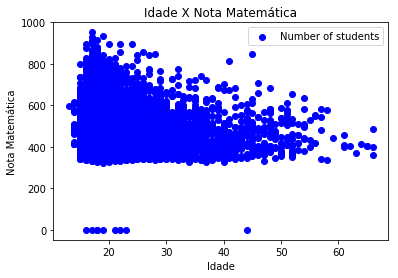

In [25]:
plt.scatter(df['NU_IDADE'], df['NU_NOTA_MT'] ,color = 'blue', label = 'Number of students')
plt.xlabel("Idade")
plt.ylabel("Nota Matemática")
plt.title("Idade X Nota Matemática")
plt.legend(loc='best')
plt.show()

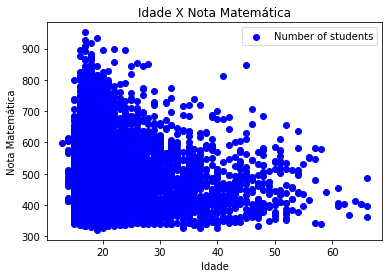

In [26]:
#Removendo os outliers
lista = df[(df.NU_NOTA_MT==0)].index
lista
df = df.drop(lista, axis=0)
plt.scatter(df['NU_IDADE'], df['NU_NOTA_MT'] ,color = 'blue', label = 'Number of students')
plt.xlabel("Idade")
plt.ylabel("Nota Matemática")
plt.title("Idade X Nota Matemática")
plt.legend(loc='best')
plt.show()

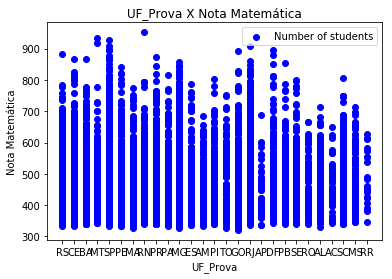

In [27]:
plt.scatter(df['SG_UF_PROVA'], df['NU_NOTA_MT'] ,color = 'blue', label = 'Number of students')
plt.xlabel("UF_Prova")
plt.ylabel("Nota Matemática")
plt.title("UF_Prova X Nota Matemática")
plt.legend(loc='best')
plt.show()

Quantidade de alunos que não tem UF de nascimento: 0
Quantidade de alunos que não tem UF de nascimento: 0


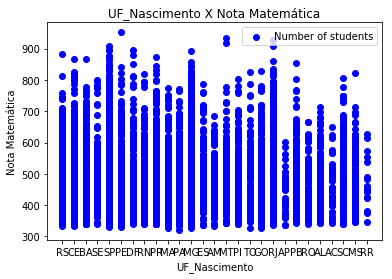

In [28]:
print("Quantidade de alunos que não tem UF de nascimento:", df.SG_UF_NASCIMENTO.isnull().sum())
df.SG_UF_NASCIMENTO.fillna("XX", inplace=True)
print("Quantidade de alunos que não tem UF de nascimento:", df.SG_UF_NASCIMENTO.isnull().sum())
plt.scatter(df['SG_UF_NASCIMENTO'], df['NU_NOTA_MT'] ,color = 'blue', label = 'Number of students')
plt.xlabel("UF_Nascimento")
plt.ylabel("Nota Matemática")
plt.title("UF_Nascimento X Nota Matemática")
plt.legend(loc='best')
plt.show()

In [29]:
columns = ["SG_UF_RESIDENCIA", "SG_UF_NASCIMENTO"]
df = df.drop(columns, axis=1)
df.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,0.0,1,1,4,1,0,0,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,0.0,3,2,0,2,0,0,...,NaN,A,A,C,A,B,A,A,C,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,18,F,0.0,1,1,1,1,0,0,...,NaN,A,A,A,A,A,A,A,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,18,F,0.0,3,2,0,2,0,0,...,0.0,A,A,A,B,B,A,A,A,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,18,F,0.0,1,1,1,1,0,0,...,NaN,C,A,A,A,A,D,A,A,A


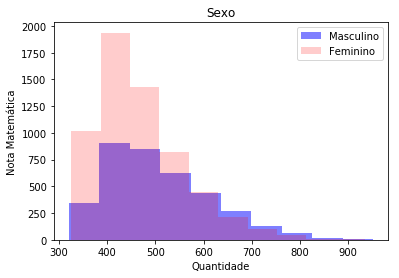

In [30]:
plt.hist(df['NU_NOTA_MT'][df['TP_SEXO'] == 'M'],color = 'blue', label = 'Masculino', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_SEXO'] == 'F'], color = 'red', label = 'Feminino', alpha=0.2)
plt.xlabel("Quantidade")
plt.ylabel("Nota Matemática")
plt.title("Sexo")
plt.legend(loc='best')
plt.show()

float64
Quantidade de alunos que não tem estado civil: 302
Quantidade de alunos que não tem estado civil: 0
int32


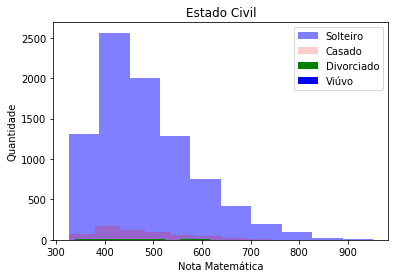

In [31]:
print(df.TP_ESTADO_CIVIL.dtype)
print("Quantidade de alunos que não tem estado civil:", df.TP_ESTADO_CIVIL.isnull().sum())
df.TP_ESTADO_CIVIL.fillna("4", inplace=True)
print("Quantidade de alunos que não tem estado civil:", df.TP_ESTADO_CIVIL.isnull().sum())
df.TP_ESTADO_CIVIL = df.TP_ESTADO_CIVIL.astype(int)
print(df.TP_ESTADO_CIVIL.dtype)
plt.hist(df['NU_NOTA_MT'][df['TP_ESTADO_CIVIL'] == 0],color = 'blue', label = 'Solteiro', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_ESTADO_CIVIL'] == 1],color = 'red', label = 'Casado', alpha=0.2)
plt.hist(df['NU_NOTA_MT'][df['TP_ESTADO_CIVIL'] == 2],color = 'green', label = 'Divorciado', alpha=1)
plt.hist(df['NU_NOTA_MT'][df['TP_ESTADO_CIVIL'] == 3],color = 'blue', label = 'Viúvo', alpha=1)
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Estado Civil")
plt.legend(loc='best')
plt.show()

Podemos notar, verificando os gráficos de Idade e Estado Civil, que a maioria das notas de matemática foram entre 300 e 600 pontos.<br>
Mas em ambos os casos não foi verificada nenhuma discrepância entre as categorias.

In [32]:
df = df.drop('TP_ESTADO_CIVIL', axis=1)
df.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,1,1,4,1,0,0,0,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,3,2,0,2,0,0,0,...,NaN,A,A,C,A,B,A,A,C,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,18,F,1,1,1,1,0,0,0,...,NaN,A,A,A,A,A,A,A,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,18,F,3,2,0,2,0,0,0,...,0.0,A,A,A,B,B,A,A,A,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,18,F,1,1,1,1,0,0,0,...,NaN,C,A,A,A,A,D,A,A,A


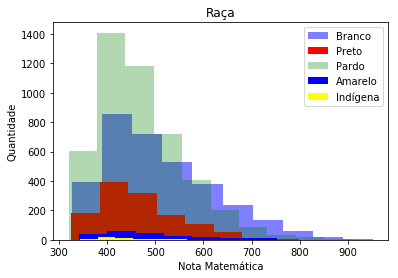

In [33]:
plt.hist(df['NU_NOTA_MT'][df['TP_COR_RACA'] == 1],color = 'blue', label = 'Branco', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_COR_RACA'] == 2],color = 'red', label = 'Preto', alpha=1)
plt.hist(df['NU_NOTA_MT'][df['TP_COR_RACA'] == 3],color = 'green', label = 'Pardo', alpha=0.3)
plt.hist(df['NU_NOTA_MT'][df['TP_COR_RACA'] == 4],color = 'blue', label = 'Amarelo', alpha=1)
plt.hist(df['NU_NOTA_MT'][df['TP_COR_RACA'] == 5],color = 'yellow', label = 'Indígena', alpha=1)
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Raça")
plt.legend(loc='best')
plt.show()

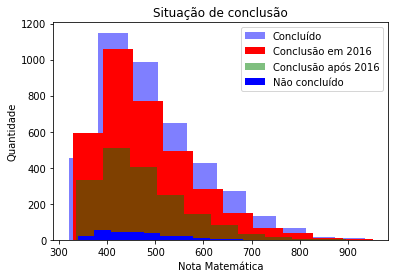

In [34]:
plt.hist(df['NU_NOTA_MT'][df['TP_ST_CONCLUSAO'] == 1],color = 'blue', label = 'Concluído', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_ST_CONCLUSAO'] == 2],color = 'red', label = 'Conclusão em 2016', alpha=1)
plt.hist(df['NU_NOTA_MT'][df['TP_ST_CONCLUSAO'] == 3],color = 'green', label = 'Conclusão após 2016', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_ST_CONCLUSAO'] == 4],color = 'blue', label = 'Não concluído', alpha=1)
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Situação de conclusão")
plt.legend(loc='best')
plt.show()

In [35]:
df = df.drop('TP_ANO_CONCLUIU', axis=1)

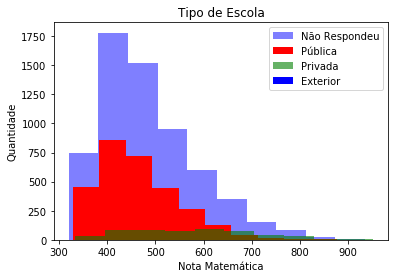

In [36]:
plt.hist(df['NU_NOTA_MT'][df['TP_ESCOLA'] == 1],color = 'blue', label = 'Não Respondeu', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['TP_ESCOLA'] == 2],color = 'red', label = 'Pública', alpha=1)
plt.hist(df['NU_NOTA_MT'][df['TP_ESCOLA'] == 3],color = 'green', label = 'Privada', alpha=0.6)
plt.hist(df['NU_NOTA_MT'][df['TP_ESCOLA'] == 4],color = 'blue', label = 'Exterior', alpha=1)
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Tipo de Escola")
plt.legend(loc='best')
plt.show()

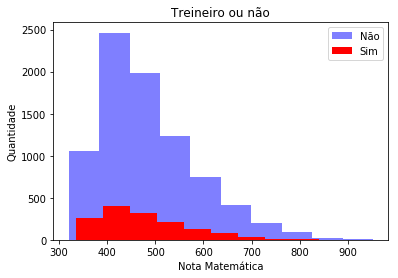

In [37]:
plt.hist(df['NU_NOTA_MT'][df['IN_TREINEIRO'] == 0],color = 'blue', label = 'Não', alpha=0.5)
plt.hist(df['NU_NOTA_MT'][df['IN_TREINEIRO'] == 1],color = 'red', label = 'Sim', alpha=1)
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Treineiro ou não")
plt.legend(loc='best')
plt.show()

#### Dados dos pedidos de atendimento especializado ####

Inscritos com baixa visão: 10
Int64Index([1310, 3761, 4736, 6137, 7643, 7937, 9610, 11698, 12783, 13322], dtype='int64')


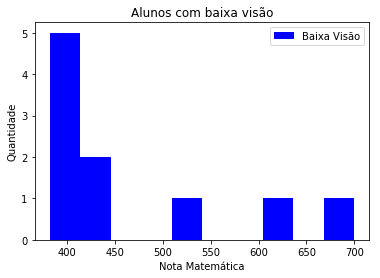

In [38]:
print("Inscritos com baixa visão:",df.IN_BAIXA_VISAO.sum())
baixa_visao = df[(df.IN_BAIXA_VISAO == 1)].index
print(baixa_visao)
plt.hist(df['NU_NOTA_MT'][df['IN_BAIXA_VISAO'] == 1],color = 'blue', label = 'Baixa Visão')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com baixa visão")
plt.legend(loc='best')
plt.show()

In [39]:
df = df.drop(baixa_visao, axis=0)
df = df.drop('IN_BAIXA_VISAO', axis=1)
#Colunas sem informações relevantes
df = df.drop('IN_CEGUEIRA', axis=1)
df = df.drop('IN_SURDO_CEGUEIRA', axis=1)
df = df.drop('IN_AUTISMO', axis=1)
df = df.drop('IN_ESTUDA_CLASSE_HOSPITALAR', axis=1)
df = df.drop('IN_BRAILLE', axis=1)
df = df.drop('IN_GUIA_INTERPRETE', axis=1)
df = df.drop('IN_MACA', axis=1)
df = df.drop('IN_COMPUTADOR', axis=1)
df = df.drop('IN_CADEIRA_ESPECIAL', axis=1)
df = df.drop('IN_CADEIRA_CANHOTO', axis=1)
df = df.drop('IN_CADEIRA_ACOLCHOADA', axis=1)
df = df.drop('IN_PROVA_DEITADO', axis=1)
df = df.drop('IN_MOBILIARIO_OBESO', axis=1)
df = df.drop('IN_LAMINA_OVERLAY', axis=1)
df = df.drop('IN_PROTETOR_AURICULAR', axis=1)
df = df.drop('IN_MEDIDOR_GLICOSE', axis=1)
df = df.drop('IN_MAQUINA_BRAILE', axis=1)
df = df.drop('IN_SOROBAN', axis=1)
df = df.drop('IN_MARCA_PASSO', axis=1)
df = df.drop('IN_SONDA', axis=1)
df = df.drop('IN_MEDICAMENTOS', axis=1)
df = df.drop('IN_SALA_INDIVIDUAL', axis=1)
df = df.drop('IN_SALA_ESPECIAL', axis=1)
df = df.drop('IN_SALA_ACOMPANHANTE', axis=1)
df = df.drop('IN_MOBILIARIO_ESPECIFICO', axis=1)
df = df.drop('IN_MATERIAL_ESPECIFICO', axis=1)
df = df.drop('IN_DISLEXIA', axis=1)
df = df.drop('IN_DISCALCULIA', axis=1)
df = df.drop('IN_AMPLIADA_24', axis=1)
df = df.drop('IN_AMPLIADA_18', axis=1)
df = df.drop('IN_TRANSCRICAO', axis=1)
df = df.drop('IN_LIBRAS', axis=1)
df = df.drop('IN_LEITURA_LABIAL', axis=1)
df = df.drop('IN_MESA_CADEIRA_RODAS', axis=1)
df = df.drop('IN_MESA_CADEIRA_SEPARADA', axis=1)
df = df.drop('IN_APOIO_PERNA', axis=1)

Inscritos com surdez: 4
Int64Index([372, 3439, 8459, 8869], dtype='int64')


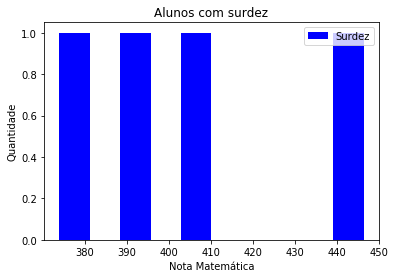

In [40]:
print("Inscritos com surdez:",df.IN_SURDEZ.sum())
surdez = df[(df.IN_SURDEZ == 1)].index
print(surdez)
plt.hist(df['NU_NOTA_MT'][df['IN_SURDEZ'] == 1],color = 'blue', label = 'Surdez')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com surdez")
plt.legend(loc='best')
plt.show()

In [41]:
df = df.drop(surdez, axis=0)
df = df.drop('IN_SURDEZ', axis=1)

Inscritos com deficiencia auditiva: 7
Int64Index([2014, 4119, 5778, 7552, 10185, 12345, 12370], dtype='int64')


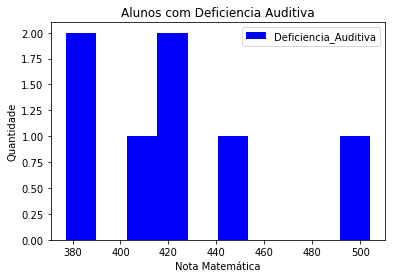

In [42]:
print("Inscritos com deficiencia auditiva:",df.IN_DEFICIENCIA_AUDITIVA.sum())
def_aud = df[(df.IN_DEFICIENCIA_AUDITIVA == 1)].index
print(def_aud)
plt.hist(df['NU_NOTA_MT'][df['IN_DEFICIENCIA_AUDITIVA'] == 1],color = 'blue', label = 'Deficiencia_Auditiva')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com Deficiencia Auditiva")
plt.legend(loc='best')
plt.show()

In [43]:
df = df.drop(def_aud, axis=0)
df = df.drop('IN_DEFICIENCIA_AUDITIVA', axis=1)

Inscritos com deficiencia fisica: 17
Int64Index([   94,  1296,  2086,  2270,  4383,  5055,  5532,  7277,  7637,
             8040,  8087,  8624, 11344, 12658, 12807, 13224, 13705],
           dtype='int64')


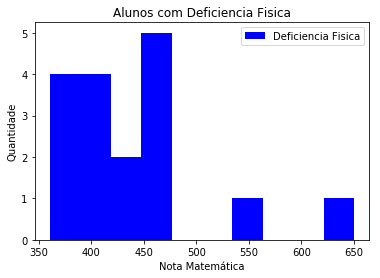

In [44]:
print("Inscritos com deficiencia fisica:",df.IN_DEFICIENCIA_FISICA.sum())
def_fis = df[(df.IN_DEFICIENCIA_FISICA == 1)].index
print(def_fis)
plt.hist(df['NU_NOTA_MT'][df['IN_DEFICIENCIA_FISICA'] == 1],color = 'blue', label = 'Deficiencia Fisica')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com Deficiencia Fisica")
plt.legend(loc='best')
plt.show()

Inscritos com deficiencia mental: 2
Int64Index([4081, 10631], dtype='int64')


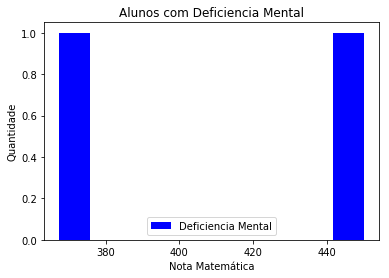

In [45]:
print("Inscritos com deficiencia mental:",df.IN_DEFICIENCIA_MENTAL.sum())
def_men = df[(df.IN_DEFICIENCIA_MENTAL == 1)].index
print(def_men)
plt.hist(df['NU_NOTA_MT'][df['IN_DEFICIENCIA_MENTAL'] == 1],color = 'blue', label = 'Deficiencia Mental')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com Deficiencia Mental")
plt.legend(loc='best')
plt.show()

In [46]:
df = df.drop(def_men, axis=0)
df = df.drop('IN_DEFICIENCIA_MENTAL', axis=1)

Inscritos com deficit de atenção: 11
Int64Index([713, 1509, 2874, 4112, 4181, 4785, 5913, 10716, 10951, 12688,
            13231],
           dtype='int64')


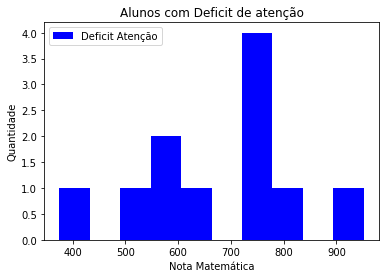

In [47]:
print("Inscritos com deficit de atenção:",df.IN_DEFICIT_ATENCAO.sum())
def_ate = df[(df.IN_DEFICIT_ATENCAO == 1)].index
print(def_ate)
plt.hist(df['NU_NOTA_MT'][df['IN_DEFICIT_ATENCAO'] == 1],color = 'blue', label = 'Deficit Atenção')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com Deficit de atenção")
plt.legend(loc='best')
plt.show()

In [48]:
df = df.drop(def_ate, axis=0)
df = df.drop('IN_DEFICIT_ATENCAO', axis=1)

Inscritos com visao monocular: 5
Int64Index([282, 2086, 4505, 5165, 7944], dtype='int64')


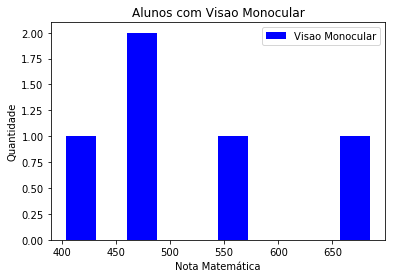

In [49]:
print("Inscritos com visao monocular:",df.IN_VISAO_MONOCULAR.sum())
vis_mon = df[(df.IN_VISAO_MONOCULAR == 1)].index
print(vis_mon)
plt.hist(df['NU_NOTA_MT'][df['IN_VISAO_MONOCULAR'] == 1],color = 'blue', label = 'Visao Monocular')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com Visao Monocular")
plt.legend(loc='best')
plt.show()

In [50]:
df = df.drop(vis_mon, axis=0)
df = df.drop('IN_VISAO_MONOCULAR', axis=1)

Inscritos com outra deficiencia ou condição especial: 2
Int64Index([5483, 11140], dtype='int64')


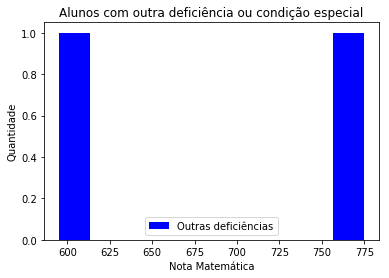

In [51]:
print("Inscritos com outra deficiencia ou condição especial:",df.IN_OUTRA_DEF.sum())
outra_def = df[(df.IN_OUTRA_DEF == 1)].index
print(outra_def)
plt.hist(df['NU_NOTA_MT'][df['IN_OUTRA_DEF'] == 1],color = 'blue', label = 'Outras deficiências')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com outra deficiência ou condição especial")
plt.legend(loc='best')
plt.show()

In [52]:
df = df.drop(outra_def, axis=0)
df = df.drop('IN_OUTRA_DEF', axis=1)

Dados dos pedidos de Atendimento Específico

Inscritos com solicitação de sabatista: 92
Int64Index([  330,   437,   919,  1020,  1023,  1070,  1267,  1975,  2205,
             2356,  2783,  2954,  3013,  3400,  3695,  3729,  3830,  3988,
             4003,  4275,  4418,  4786,  4866,  5060,  5200,  5250,  5275,
             5574,  6040,  6169,  6189,  6300,  6417,  6452,  6833,  6853,
             6884,  7050,  7123,  7220,  7355,  7402,  7490,  7580,  7650,
             7693,  7827,  7856,  7859,  7874,  8054,  8129,  8254,  8462,
             8501,  8625,  8704,  8777,  8846,  8934,  8945,  8959,  9046,
             9239,  9811,  9907, 10053, 10160, 10253, 10354, 10467, 10687,
            10891, 11036, 11145, 11425, 11595, 11628, 11692, 11817, 12129,
            12154, 12183, 12215, 12260, 12286, 12518, 12767, 13026, 13138,
            13246, 13625],
           dtype='int64')


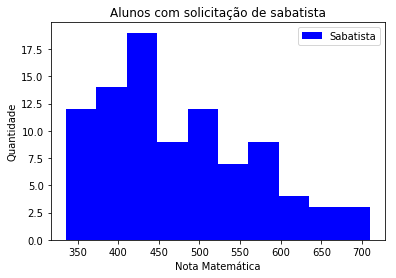

In [53]:
print("Inscritos com solicitação de sabatista:",df.IN_SABATISTA.sum())
sabatista = df[(df.IN_SABATISTA == 1)].index
print(sabatista)
plt.hist(df['NU_NOTA_MT'][df['IN_SABATISTA'] == 1],color = 'blue', label = 'Sabatista')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de sabatista")
plt.legend(loc='best')
plt.show()

Inscritos com solicitação de gestante: 4
Int64Index([1268, 6469, 7491, 10596], dtype='int64')


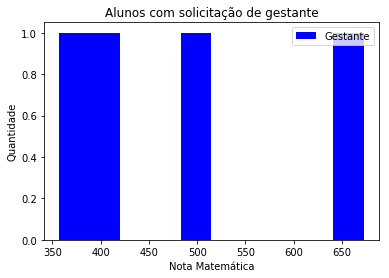

In [54]:
print("Inscritos com solicitação de gestante:",df.IN_GESTANTE.sum())
gestante = df[(df.IN_GESTANTE == 1)].index
print(gestante)
plt.hist(df['NU_NOTA_MT'][df['IN_GESTANTE'] == 1],color = 'blue', label = 'Gestante')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de gestante")
plt.legend(loc='best')
plt.show()

In [55]:
df = df.drop(gestante, axis=0)
df = df.drop('IN_GESTANTE', axis=1)

Inscritos com solicitação de lactante: 7
Int64Index([2919, 3311, 5262, 6951, 7861, 10047, 12141], dtype='int64')


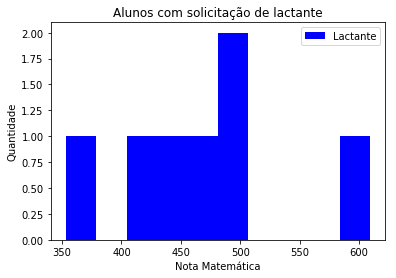

In [56]:
print("Inscritos com solicitação de lactante:",df.IN_LACTANTE.sum())
lactante = df[(df.IN_LACTANTE == 1)].index
print(lactante)
plt.hist(df['NU_NOTA_MT'][df['IN_LACTANTE'] == 1],color = 'blue', label = 'Lactante')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de lactante")
plt.legend(loc='best')
plt.show()

In [57]:
df = df.drop(lactante, axis=0)
df = df.drop('IN_LACTANTE', axis=1)

Inscritos com solicitação de idoso: 1
Int64Index([2215], dtype='int64')


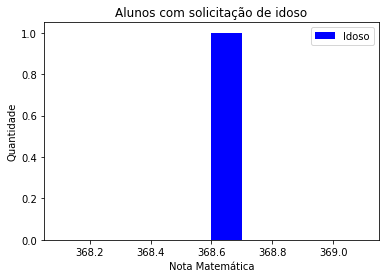

In [58]:
print("Inscritos com solicitação de idoso:",df.IN_IDOSO.sum())
idoso = df[(df.IN_IDOSO == 1)].index
print(idoso)
plt.hist(df['NU_NOTA_MT'][df['IN_IDOSO'] == 1],color = 'blue', label = 'Idoso')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de idoso")
plt.legend(loc='best')
plt.show()

In [59]:
df = df.drop(idoso, axis=0)
df = df.drop('IN_IDOSO', axis=1)

Dados de pedidos de recursos especializados e específicos para realização das provas

In [60]:
df = df.drop("IN_SEM_RECURSO", axis=1)

Inscritos com solicitação de auxílio para leitura 2
Int64Index([5055, 7277], dtype='int64')


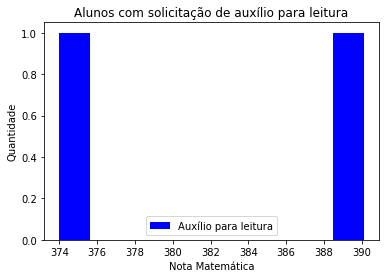

In [61]:
print("Inscritos com solicitação de auxílio para leitura",df.IN_LEDOR.sum())
ledor = df[(df.IN_LEDOR == 1)].index
print(ledor)
plt.hist(df['NU_NOTA_MT'][df['IN_LEDOR'] == 1],color = 'blue', label = 'Auxílio para leitura')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de auxílio para leitura")
plt.legend(loc='best')
plt.show()

In [62]:
df = df.drop(ledor, axis=0)
df = df.drop('IN_LEDOR', axis=1)

Inscritos com solicitação de fácil acesso a sala 9
Int64Index([1296, 2270, 4383, 7637, 8040, 8087, 8624, 12658, 13224], dtype='int64')


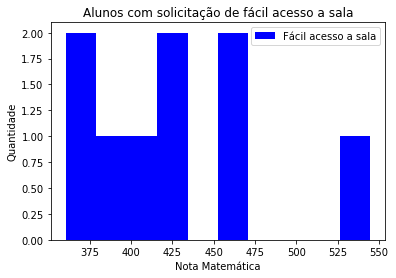

In [63]:
print("Inscritos com solicitação de fácil acesso a sala",df.IN_ACESSO.sum())
acesso = df[(df.IN_ACESSO == 1)].index
print(acesso)
plt.hist(df['NU_NOTA_MT'][df['IN_ACESSO'] == 1],color = 'blue', label = 'Fácil acesso a sala')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de fácil acesso a sala")
plt.legend(loc='best')
plt.show()

In [64]:
df = df.drop(acesso, axis=0)
df = df.drop('IN_ACESSO', axis=1)

Inscritos com solicitação de nome social 3
Int64Index([1130, 10539, 11760], dtype='int64')


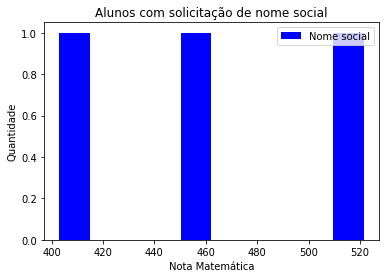

In [65]:
print("Inscritos com solicitação de nome social",df.IN_NOME_SOCIAL.sum())
nome_social = df[(df.IN_NOME_SOCIAL == 1)].index
print(nome_social)
plt.hist(df['NU_NOTA_MT'][df['IN_NOME_SOCIAL'] == 1],color = 'blue', label = 'Nome social')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de nome social")
plt.legend(loc='best')
plt.show()

In [66]:
df = df.drop(nome_social, axis=0)
df = df.drop('IN_NOME_SOCIAL', axis=1)

Inscritos com solicitação de certificação no ensino médio 935
Int64Index([   27,    28,    32,    50,    63,    98,   102,   124,   139,
              159,
            ...
            13540, 13575, 13603, 13620, 13630, 13657, 13688, 13693, 13724,
            13728],
           dtype='int64', length=935)


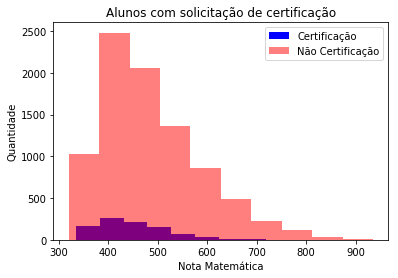

In [67]:
print("Inscritos com solicitação de certificação no ensino médio",df.IN_CERTIFICADO.sum())
cert = df[(df.IN_CERTIFICADO == 1)].index
print(cert)
plt.hist(df['NU_NOTA_MT'][df['IN_CERTIFICADO'] == 1],color = 'blue', label = 'Certificação')
plt.hist(df['NU_NOTA_MT'][df['IN_CERTIFICADO'] == 0],color = 'red', alpha = 0.5, label = 'Não Certificação')
plt.xlabel("Nota Matemática")
plt.ylabel("Quantidade")
plt.title("Alunos com solicitação de certificação")
plt.legend(loc='best')
plt.show()

In [68]:
columns = ["NO_MUNICIPIO_PROVA"]
df = df.drop(columns, axis=1)

In [69]:
df.shape

(9611, 70)

### Dados do questionário socioeconômico ###

Em um primeiro momento iremos trabalhar com as seguintes variáveis do questionátio socioeconômico:<br>
- Q001: Nível de estudos do pai
- Q002: Nível de estudos da mãe
- Q006: Renda mensal familiar
- Q026: Se trabalhou ou trabalha
- Q027: Idade que começou a trabalhar
- Q028: Horas semanais trabalhadas
- Q042: Tipo de escola (ensino fundamental)
- Q043: Modalidade (ensino fundamental)
- Q044: Turno (ensino fundamental)
- Q045: Se abandonou os estudos (ensino fundamental)
- Q047: Tipo de escola (ensino médio)
- Q048: Modalidade (ensino médio)
- Q049: Turno (ensino médio)
- Q050: Se abandonou os estudos (ensino médio)

In [70]:
columns = ['Q003', 'Q004', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
           'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q029', 'Q030', 'Q031', 'Q032', 'Q033', 'Q034',
           'Q035', 'Q036', 'Q037', 'Q038', 'Q039', 'Q040', 'Q041', 'Q046']
df = df.drop(columns, axis=1)
df.columns

Index(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'IN_TREINEIRO', 'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA',
       'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027',
       'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050'],
      dtype='object')

### Tratamento das variáveis categóricas ###

In [71]:
df_NU_INSCRICAO = df.NU_INSCRICAO
df = df.drop('NU_INSCRICAO', axis=1)

In [72]:
df_sexo = pd.get_dummies(df.TP_SEXO)
df = pd.concat([df, df_sexo], axis=1)
df.rename(columns={'F':'Feminino','M':'Masculino'}, inplace=True)
df = df.drop('TP_SEXO',axis=1)
df.columns

Index(['NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA',
       'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027',
       'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino'],
      dtype='object')

In [73]:
df_cor_raca = pd.get_dummies(df.TP_COR_RACA)
df = pd.concat([df, df_cor_raca], axis=1)
df.rename(columns={0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indigena',
                   6:'Não dispões da informação'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA',
       'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027',
       'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena'],
      dtype='object')

In [74]:
df = df.drop('TP_COR_RACA',axis=1)

In [75]:
df_st_conclusao = pd.get_dummies(df.TP_ST_CONCLUSAO)
df = pd.concat([df, df_st_conclusao], axis=1)
df.rename(columns={1:'Concluido', 2:'Conclusao_2016', 3:'Conclusao_apos_2016', 4:'Nao_Concluido_nem_cursando'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA', 'IN_CERTIFICADO',
       'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027', 'Q028',
       'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando'],
      dtype='object')

In [76]:
df = df.drop('TP_ST_CONCLUSAO',axis=1)

In [77]:
df_tp_escola = pd.get_dummies(df.TP_ESCOLA)
df = pd.concat([df, df_tp_escola], axis=1)
df.rename(columns={1:'Nao_informado', 2:'Publica', 3:'Privada', 4:'Exterior'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_DEFICIENCIA_FISICA',
       'IN_SABATISTA', 'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006',
       'Q026', 'Q027', 'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048',
       'Q049', 'Q050', 'Feminino', 'Masculino', 'Não declarado', 'Branca',
       'Preta', 'Parda', 'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior'],
      dtype='object')

In [78]:
df = df.drop('TP_ESCOLA',axis=1)

In [79]:
df_treineiro = pd.get_dummies(df.IN_TREINEIRO)
df = pd.concat([df, df_treineiro], axis=1)
df.rename(columns={1:'Treineiro', 0:'Nao_treineiro'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'IN_TREINEIRO', 'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA',
       'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027',
       'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior', 'Nao_treineiro', 'Treineiro'],
      dtype='object')

In [80]:
df = df.drop('IN_TREINEIRO',axis=1)

In [81]:
df_def_fis = pd.get_dummies(df.IN_DEFICIENCIA_FISICA)
df = pd.concat([df, df_def_fis], axis=1)
df.rename(columns={1:'Deficiente_Fisico', 0:'Nao_Deficiente_Fisico'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'IN_DEFICIENCIA_FISICA', 'IN_SABATISTA', 'IN_CERTIFICADO',
       'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027', 'Q028',
       'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior', 'Nao_treineiro', 'Treineiro',
       'Nao_Deficiente_Fisico', 'Deficiente_Fisico'],
      dtype='object')

In [82]:
df = df.drop('IN_DEFICIENCIA_FISICA',axis=1)

In [83]:
df_sab = pd.get_dummies(df.IN_SABATISTA)
df = pd.concat([df, df_sab], axis=1)
df.rename(columns={1:'Sabatista', 0:'Nao_Sabatista'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'IN_SABATISTA', 'IN_CERTIFICADO', 'SG_UF_PROVA',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027', 'Q028',
       'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior', 'Nao_treineiro', 'Treineiro',
       'Nao_Deficiente_Fisico', 'Deficiente_Fisico', 'Nao_Sabatista',
       'Sabatista'],
      dtype='object')

In [84]:
df = df.drop('IN_SABATISTA',axis=1)

In [85]:
df_cert = pd.get_dummies(df.IN_CERTIFICADO)
df = pd.concat([df, df_cert], axis=1)
df.rename(columns={1:'Certificado', 0:'Nao_Certificado'},
                   inplace=True)
df.columns

Index(['NU_IDADE', 'IN_CERTIFICADO', 'SG_UF_PROVA', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006',
       'Q026', 'Q027', 'Q028', 'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048',
       'Q049', 'Q050', 'Feminino', 'Masculino', 'Não declarado', 'Branca',
       'Preta', 'Parda', 'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior', 'Nao_treineiro', 'Treineiro',
       'Nao_Deficiente_Fisico', 'Deficiente_Fisico', 'Nao_Sabatista',
       'Sabatista', 'Nao_Certificado', 'Certificado'],
      dtype='object')

In [86]:
df = df.drop('IN_CERTIFICADO',axis=1)

In [87]:
df_uf = pd.get_dummies(df.SG_UF_PROVA)
df = pd.concat([df, df_uf], axis=1)

In [88]:
df = df.drop('SG_UF_PROVA',axis=1)

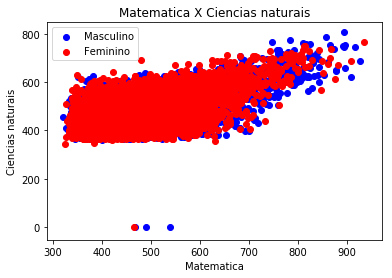

In [89]:
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_CN'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_CN'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Ciencias naturais")
plt.title("Matematica X Ciencias naturais")
plt.legend(loc='best')
plt.show()

In [90]:
i = df[(df.NU_NOTA_CN == 0)].index
i

Int64Index([2194, 10623, 12120, 13042], dtype='int64')

In [91]:
df = df.drop(i, axis=0)

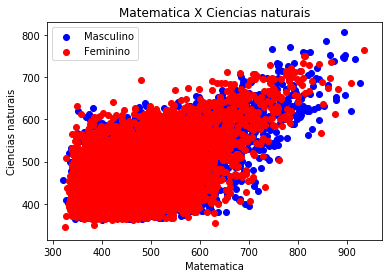

In [92]:
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_CN'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_CN'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Ciencias naturais")
plt.title("Matematica X Ciencias naturais")
plt.legend(loc='best')
plt.show()

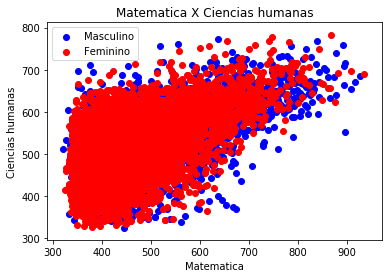

In [93]:
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_CH'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_CH'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Ciencias humanas")
plt.title("Matematica X Ciencias humanas")
plt.legend(loc='best')
plt.show()

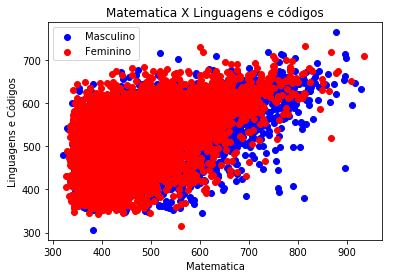

In [94]:
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_LC'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_LC'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Linguagens e Códigos")
plt.title("Matematica X Linguagens e códigos")
plt.legend(loc='best')
plt.show()

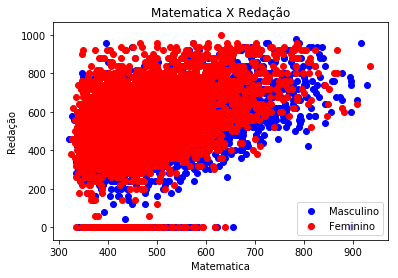

In [95]:
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_REDACAO'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_REDACAO'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Redação")
plt.title("Matematica X Redação")
plt.legend(loc='best')
plt.show()

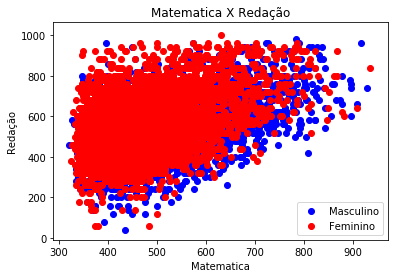

In [96]:
i = df[(df.NU_NOTA_REDACAO == 0)].index
df = df.drop(i, axis=0)
plt.scatter(df['NU_NOTA_MT'][df['Masculino'] == 1],df['NU_NOTA_REDACAO'][df['Masculino'] == 1],color = 'blue', label = 'Masculino')
plt.scatter(df['NU_NOTA_MT'][df['Feminino'] == 1],df['NU_NOTA_REDACAO'][df['Feminino'] == 1],color = 'red', label = 'Feminino')
plt.xlabel("Matematica")
plt.ylabel("Redação")
plt.title("Matematica X Redação")
plt.legend(loc='best')
plt.show()

In [97]:
df.columns

Index(['NU_IDADE', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q026', 'Q027', 'Q028',
       'Q042', 'Q043', 'Q044', 'Q045', 'Q047', 'Q048', 'Q049', 'Q050',
       'Feminino', 'Masculino', 'Não declarado', 'Branca', 'Preta', 'Parda',
       'Amarela', 'Indigena', 'Concluido', 'Conclusao_2016',
       'Conclusao_apos_2016', 'Nao_Concluido_nem_cursando', 'Nao_informado',
       'Publica', 'Privada', 'Exterior', 'Nao_treineiro', 'Treineiro',
       'Nao_Deficiente_Fisico', 'Deficiente_Fisico', 'Nao_Sabatista',
       'Sabatista', 'Nao_Certificado', 'Certificado', 'AC', 'AL', 'AM', 'AP',
       'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE',
       'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'],
      dtype='object')

In [98]:
columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
df = df.drop(columns,axis=1)

In [99]:
df_estudo_pai = pd.get_dummies(df.Q001)
df = pd.concat([df, df_estudo_pai], axis=1)

In [100]:
df.rename(columns={'A':'Pai_nunca_estudou', 'B':'Pai_quinto_ano_incompleto', 'C':'Pai_oitavo_ano_incompleto',
                   'D':'Pai_ensino_medio_incompleto', 'E':'Pai_faculdade_incompleto', 'F':'Pai_pos_incompleto',
                   'G':'Pai_pos', 'H':'Não sabe'},
                   inplace=True)

In [101]:
df = df.drop('Q001',axis=1)

In [102]:
df_estudo_mae = pd.get_dummies(df.Q002)
df = pd.concat([df, df_estudo_mae], axis=1)
df.rename(columns={'A':'Mae_nunca_estudou', 'B':'Mae_quinto_ano_incompleto', 'C':'Mae_oitavo_ano_incompleto',
                   'D':'Mae_ensino_medio_incompleto', 'E':'Mae_faculdade_incompleto', 'F':'Mae_pos_incompleto',
                   'G':'Mae_pos', 'H':'Não sabe'},
                   inplace=True)
df = df.drop('Q002',axis=1)

In [103]:
df_renda = pd.get_dummies(df.Q006)
df = pd.concat([df, df_renda], axis=1)
df.rename(columns={'A':'Renda_nenhuma', 'B':'Renda_880', 'C':'Renda_1320', 'D':'Renda_1760', 'E':'Renda_2200',
                   'F':'Renda_2640', 'G':'Renda_3520', 'H':'Renda_4400', 'I':'Renda_5280', 'J':'Renda_6160',
                   'K':'Renda_7040', 'L':'Renda_7920', 'M':'Renda_8800', 'N':'Renda_10560', 'O':'Renda_13200',
                   'P':'Renda_17600', 'Q':'Renda_mais_17600'},
                   inplace=True)
df = df.drop('Q006',axis=1)

In [104]:
df_trabalho = pd.get_dummies(df.Q026)
df = pd.concat([df, df_trabalho], axis=1)
df.rename(columns={'A':'Trabalho_nunca', 'B':'Trabalho_nao_atualmente', 'C':'Trabalho_sim'},
                   inplace=True)
df = df.drop('Q026',axis=1)

In [105]:
df_trabalho_inicio = pd.get_dummies(df.Q027)
df = pd.concat([df, df_trabalho_inicio], axis=1)
df.rename(columns={'A':'Trabalho_inicio_menor_14', 'B':'Trabalho_inicio_14', 'C':'Trabalho_inicio_15', 'D':'Trabalho_inicio_16',
                   'E':'Trabalho_inicio_17', 'F':'Trabalho_inicio_18', 'G':'Trabalho_inicio_19', 'H':'Trabalho_inicio_20',
                   'I':'Trabalho_inicio_21', 'J':'Trabalho_inicio_22', 'K':'Trabalho_inicio_23', 'L':'Trabalho_inicio_24',
                   'M':'Trabalho_inicio_25_mais'},
                   inplace=True)
df = df.drop('Q027',axis=1)

In [106]:
df_trabalho_horas = pd.get_dummies(df.Q028)
df = pd.concat([df, df_trabalho_horas], axis=1)
df.rename(columns={'A':'Trabalho_10_horas_semanais', 'B':'Trabalho_11_20_horas_semanais', 'C':'Trabalho_21_30_horas_semanais',
                   'D':'Trabalho_31_40_horas_semanais', 'E':'Trabalho_40_mais_horas_semanais'},
                   inplace=True)
df = df.drop('Q028',axis=1)

In [107]:
df_tipo_escola_fundamental = pd.get_dummies(df.Q042)
df = pd.concat([df, df_tipo_escola_fundamental], axis=1)
df.rename(columns={'A':'Tipo_Escola_Somente_Publica', 'B':'Tipo_Escola_Maioria_Publica', 'C':'Tipo_Escola_Somente_Particular',
                   'D':'Tipo_Escola_Maioria_Particular', 'E':'Tipo_Escola_Somente_Indigena', 'F':'Tipo_Escola_Maioria_Indigena',
                   'G':'Tipo_Escola_Somente_Quilombola', 'H':'Tipo_Escola_Maioria_Quilombola'},
                   inplace=True)
df = df.drop('Q042',axis=1)

In [108]:
df_modalidade_escola_fundamental = pd.get_dummies(df.Q043)
df = pd.concat([df, df_modalidade_escola_fundamental], axis=1)
df.rename(columns={'A':'Mod_Escola_Somente_Regular', 'B':'Mod_Escola_Regular_EJA', 'C':'Mod_Escola_EJA','D':'Mod_Escola_Outros'},
                   inplace=True)
df = df.drop('Q043',axis=1)

In [109]:
df_turno_escola_fundamental = pd.get_dummies(df.Q044)
df = pd.concat([df, df_turno_escola_fundamental], axis=1)
df.rename(columns={'A':'Turno_Escola_Diurno', 'B':'Turno_Escola_Diurno_Noturno', 'C':'Turno_Escola_Noturno'},
                   inplace=True)
df = df.drop('Q044',axis=1)

In [110]:
df_abandono_escola_fundamental = pd.get_dummies(df.Q045)
df = pd.concat([df, df_abandono_escola_fundamental], axis=1)
df.rename(columns={'A':'Fundamental_Nao_Abandono_Reprovacao', 'B':'Fundamental_Nao_Abandono_Sim_Reprovacao',
                   'C':'Fundamental_Sim_Abandono_Nao_Reprovacao', 'D':'Fundamental_Sim_Abandono_Reprovacao'},
                   inplace=True)
df = df.drop('Q045',axis=1)

In [111]:
df_tipo_escola_medio = pd.get_dummies(df.Q047)
df = pd.concat([df, df_tipo_escola_medio], axis=1)
df.rename(columns={'A':'Tipo_Escola_Somente_Publica_Medio', 'B':'Tipo_Escola_Publica_Privada_Sem_Bolsa_Medio',
                   'C':'Tipo_Escola_Publica_Privada_Com_Bolsa_Medio', 'D':'Tipo_Escola_Privada_Sem_Bolsa_Medio',
                   'E':'Tipo_Escola_Privada_Com_Bolsa_Medio'},
                   inplace=True)
df = df.drop('Q047',axis=1)

In [112]:
df_modalidade_escola_medio = pd.get_dummies(df.Q048)
df = pd.concat([df, df_modalidade_escola_medio], axis=1)
df.rename(columns={'A':'Mod_Escola_Somente_Regular_Medio', 'B':'Mod_Escola_Regular_EJA_Medio', 'C':'Mod_Escola_EJA_Medio',
                   'D':'Mod_Escola_Outros_Medio'},
                   inplace=True)
df = df.drop('Q048',axis=1)

In [113]:
df_turno_escola_medio = pd.get_dummies(df.Q049)
df = pd.concat([df, df_turno_escola_medio], axis=1)
df.rename(columns={'A':'Turno_Escola_Diurno_Medio', 'B':'Turno_Escola_Diurno_Noturno_Medio', 'C':'Turno_Escola_Noturno_Medio'},
                   inplace=True)
df = df.drop('Q049',axis=1)

In [114]:
df_abandono_escola_medio = pd.get_dummies(df.Q050)
df = pd.concat([df, df_abandono_escola_medio], axis=1)
df.rename(columns={'A':'Fundamental_Nao_Abandono_Reprovacao_Medio', 'B':'Fundamental_Nao_Abandono_Sim_Reprovacao_Medio',
                   'C':'Fundamental_Sim_Abandono_Nao_Reprovacao_Medio', 'D':'Fundamental_Sim_Abandono_Reprovacao_Medio'},
                   inplace=True)
df = df.drop('Q050',axis=1)
df.columns

Index(['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Feminino', 'Masculino', 'Não declarado', 'Branca',
       ...
       'Mod_Escola_Regular_EJA_Medio', 'Mod_Escola_EJA_Medio',
       'Mod_Escola_Outros_Medio', 'Turno_Escola_Diurno_Medio',
       'Turno_Escola_Diurno_Noturno_Medio', 'Turno_Escola_Noturno_Medio',
       'Fundamental_Nao_Abandono_Reprovacao_Medio',
       'Fundamental_Nao_Abandono_Sim_Reprovacao_Medio',
       'Fundamental_Sim_Abandono_Nao_Reprovacao_Medio',
       'Fundamental_Sim_Abandono_Reprovacao_Medio'],
      dtype='object', length=145)

Para realizar a regressão devemos ter apenas dados numéricos e esse foi o motivo para obtermos os 'dummies' das variáveis categóricas.<br>
Porém, com a exploração acima, podemos notar que as notas das outras matérias tem uma relação linear com a nota de matemática.<br>
Isso mostra fortes candidatas para o modelo. Para ficar mais claro, veremos a correlação das variáveis.

In [115]:
# Selecionar somente valores numéricos (inteiros e floats)
df_test = df_test.select_dtypes(include=['int64','float64'])

var = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
df_test[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


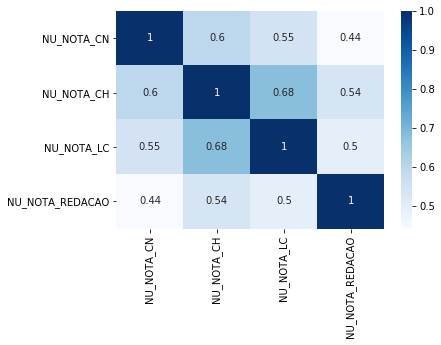

In [116]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
sns.heatmap(df_test[features].corr(), annot=True, linecolor='Black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

In [117]:
#Verificação de dados faltantes
df_test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

Para solucionar esse problema iremos preencher os dados faltantes com a média das notas

In [118]:
#dataframe de treinamento
df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].mean(), inplace=True)
df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].mean(), inplace=True)
df['NU_NOTA_LC'].fillna(df['NU_NOTA_LC'].mean(), inplace=True)
df['NU_NOTA_REDACAO'].fillna(df['NU_NOTA_REDACAO'].mean(), inplace=True)
#dataframe de teste
df_test['NU_NOTA_CN'].fillna(df_test['NU_NOTA_CN'].mean(), inplace=True)
df_test['NU_NOTA_CH'].fillna(df_test['NU_NOTA_CH'].mean(), inplace=True)
df_test['NU_NOTA_LC'].fillna(df_test['NU_NOTA_LC'].mean(), inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(df_test['NU_NOTA_REDACAO'].mean(), inplace=True)
#Verificação de dados faltantes
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

## Modelos ##

In [119]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,  GridSearchCV


from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeRegressor

In [120]:
#Variavel alvo
y = df['NU_NOTA_MT']

In [121]:
#Dados para treinamento do modelo
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
x_train = df[features]

In [122]:
x_test = df_test[features]

#### Random Forest ###

In [123]:
#n_estimators=200 (nº de nós), n_jobs=-1 (processar tudo), warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

In [124]:
# max_features : O número de features a considerar quando pesquisar pela melhor separação
# max_depth :  Profundidade máxima da árvore de decisão.
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [125]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(x_train, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=True))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
print(clf.best_params_)

{'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'sqrt'}


In [127]:
pred_notas = clf.predict(x_test)

In [128]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [129]:
#Exemplo de respostas
pred_notas

array([431.2905102 , 452.71431935, 583.94097906, ..., 677.09441755,
       452.51764212, 455.47443051])

In [130]:
len(np.unique(pred_notas))

3441

In [131]:
df_resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.29
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,452.71
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.94
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,455.47
4,715494628a50142ce8cb17191cfe6d0f3cae0934,531.08


In [132]:
df_resposta.to_csv('answer.csv', index=False, header=True)

In [133]:
# Salvar o modelo preditivo
joblib.dump(clf, 'rf_regressor.pkl')

# Usar/carregar o modelo preditivo
#clf2 = joblib.load('rf_regressor.pkl')
#clf2.predict(x_test)

['rf_regressor.pkl']

#### Decision Tree ###

In [134]:
pipetree = make_pipeline(preprocessing.StandardScaler(), DecisionTreeRegressor())

In [135]:
hyperparameters_tree = {'decisiontreeregressor__max_features' : ['auto', 'sqrt', 'log2'],
                        'decisiontreeregressor__max_depth': [None, 5, 3, 1],
                        'decisiontreeregressor__min_samples_split': [2,3,4,5,6]},

In [136]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipetree, hyperparameters_tree, cv=10)
clf.fit(x_train, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=({'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2'], 'decisiontreeregressor__max_depth': [None, 5, 3, 1], 'decisiontreeregressor__min_samples_split': [2, 3, 4, 5, 6]},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
print(clf.best_params_)

{'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__max_features': 'auto', 'decisiontreeregressor__min_samples_split': 5}


In [138]:
pred_tree = clf.predict(x_test)
pred_tree

array([440.2722067 , 449.08910649, 608.06258993, ..., 664.40391061,
       449.08910649, 463.8406278 ])

In [139]:
print("Notas Distintas:",len(np.unique(pred_tree)))

Notas Distintas: 30


#### AdaBoost ####

In [140]:
pipe_ada = make_pipeline(preprocessing.StandardScaler(), AdaBoostRegressor())
hyperparameters_ada = {'adaboostregressor__n_estimators' : [50,100,200],
                       'adaboostregressor__learning_rate': [1.,2.,3.,4.],
                       'adaboostregressor__loss': ['linear', 'square', 'exponential']}

# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipe_ada, hyperparameters_ada, cv=10)
clf.fit(x_train, y)

print()
print(clf.best_params_)

print()
pred_ada = clf.predict(x_test)
print(pred_ada)

print()
print("Notas Distintas:",len(np.unique(pred_ada)))

c:\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



{'adaboostregressor__learning_rate': 1.0, 'adaboostregressor__loss': 'linear', 'adaboostregressor__n_estimators': 100}

[478.52339657 466.15879551 593.15991091 ... 640.06308725 457.86179821
 486.68953762]

Notas Distintas: 120


Dentro os modelos testados, Random Forest foi o que mostrou maior número de previsões de notas diferentes.<br>
Isso mostra um indicativo de que devemos usá-lo.

## Resultado ##

Após o envio, o modelo acima obteve um Score de 76.31%